<h2>Tehtävä 1 - Sales Datan Valmistelu ja Kuvaileva Analytiikka</h2>

<h4>Datan Valmistelu</h4>

<p>Mitkä ovat muuttujien nimet, arvot ja tyypit? </p>
<p>Minkälaisia tilastollisia tunnuslukuja datasta saa?</p>
<p>Mitkä ovat suurimmat ja pienimmät myynnit?</p>

<h4>Kuvaileva Analytiikka </h4>

<p>Mikä on tilausten status? Miten tilaukset jakautuvat vuosille?</p>
<p>Minkä verran eri kokoisia diilejä on tehty?</p>
<p>Minkä verran eri tuoteryhmien tuotteita on myyty?</p>
<p>Miten tilaukset on jakautunut eri vuosille?</p>
<p>Miten paljon eri tuoteryhmiä on myyty?</p>
<p>Miten tilausten määrä jakautuu eri maiden välille?</p>
<p>Miten myynti jakautuu?</p>

<p></p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#tuodaan kirjastot ja tulostusta koskeva 

plt.style.use("seaborn-pastel")

<h3>Aineiston tarkastelu</h3>

In [2]:
df = pd.read_csv('http://taanila.fi/sales_data_sample.csv', encoding = 'cp1252')
pd.options.display.max_rows = df.shape[0]
df 
#tuodaan aineisto ccsv muodossa ohjeen mukaan

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


<h4>Mitkä ovat muuttujien nimet, arvot ja tyypit?</h4>

In [3]:
# Muuttujien nimet, arvojen lukumäärät ja muuttujien tyypit
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
for arvot in df:
    print (arvot, df[arvot].unique()) #mitä arvoja voidaan saada

ORDERNUMBER [10107 10121 10134 10145 10159 10168 10180 10188 10201 10211 10223 10237
 10251 10263 10275 10285 10299 10309 10318 10329 10341 10361 10375 10388
 10403 10417 10103 10112 10126 10140 10150 10163 10174 10183 10194 10206
 10215 10228 10245 10258 10270 10280 10291 10304 10312 10322 10333 10347
 10357 10369 10381 10391 10411 10424 10120 10210 10236 10298 10308 10339
 10374 10402 10362 10105 10119 10129 10143 10155 10167 10178 10186 10197
 10209 10222 10248 10261 10273 10283 10295 10307 10316 10325 10337 10350
 10359 10373 10384 10395 10400 10414 10114 10164 10175 10207 10217 10229
 10259 10281 10305 10313 10334 10370 10425 10108 10122 10135 10147 10169
 10181 10191 10203 10225 10238 10253 10266 10276 10287 10300 10310 10320
 10363 10389 10419 10117 10127 10142 10153 10165 10176 10185 10196 10208
 10220 10231 10247 10272 10282 10293 10306 10314 10336 10348 10371 10382
 10413 10113 10216 10189 10224 10319 10104 10230 10324 10358 10372 10160
 10170 10212 10376 10349 10396 10377 10

In [5]:
df['STATUS'].apply(type).value_counts()

<class 'str'>    2823
Name: STATUS, dtype: int64

<h4>Minkälaisia tilastollisia tunnuslukuja datasta saa?</h4>

In [6]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
df1 = df[["QUANTITYORDERED", "PRICEEACH", "SALES"]].describe().round(2)

df1.index = ["Lukumäärä", "Keskiarvo", "Keskihajonta", "Pienin", "Alaneljännes", "Mediaani", "Yläneljännes", "Suurin"]

df1.columns = ["Tilattu kpl", "Kpl hinta", "Myynti"]
df1.style.format({"Tilattu kpl" : "{:.0f}", "Kpl hinta" : "{:.2f}" " €", "Myynti" : "{:.2f}" " €"}) 
#esimerkkinä käytetty €-merkkiä valuutta voi olla joku muukin
#En osaa poistaa merkkiä ensimmäiseltä riviltä

,Tilattu kpl,Kpl hinta,Myynti
Lukumäärä,2823,2823.00 €,2823.00 €
Keskiarvo,35,83.66 €,3553.89 €
Keskihajonta,10,20.17 €,1841.87 €
Pienin,6,26.88 €,482.13 €
Alaneljännes,27,68.86 €,2203.43 €
Mediaani,35,95.70 €,3184.80 €
Yläneljännes,43,100.00 €,4508.00 €
Suurin,97,100.00 €,14082.80 €


<h4>Mitkä ovat suurimmat ja pienimmät myynnit?</h4>

In [8]:
df.nlargest(n=5, columns="SALES")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
598,10407,76,100.0,2,14082.8,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Large
744,10322,50,100.0,6,12536.5,11/4/2004 0:00,Shipped,4,11,2004,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Large
53,10424,50,100.0,6,12001.0,5/31/2005 0:00,In Process,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
1062,10412,60,100.0,9,11887.8,5/3/2005 0:00,Shipped,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
104,10403,66,100.0,9,11886.6,4/8/2005 0:00,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large


In [9]:
df.nsmallest(n=5, columns="SALES")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2249,10425,11,43.83,6,482.13,5/31/2005 0:00,In Process,2,5,2005,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
1287,10407,6,90.19,3,541.14,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Small
2044,10408,15,36.93,1,553.95,4/22/2005 0:00,Shipped,2,4,2005,...,2-2-8 Roppongi,NaN,Minato-ku,Tokyo,106-0032,Japan,Japan,Shimamura,Akiko,Small
1551,10280,20,28.88,12,577.60,8/17/2004 0:00,Shipped,3,8,2004,...,Via Monte Bianco 34,NaN,Torino,NaN,10100,Italy,EMEA,Accorti,Paolo,Small
1818,10419,15,42.67,7,640.05,5/17/2005 0:00,Shipped,2,5,2005,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Small


In [10]:
#En saa suodatusta toimimaan
#df1[df1["DEALSIZE"] == "SMALL"]
#df1[df1["DEALSIZE"].astype(str).str.contains("Large")]

<h4>Mikä on tilausten status? Miten tilaukset jakautuvat vuosille?</h4>

In [11]:
#STATUS = ["Lähetetty", "Epäselvä", "Käsittelyssä", "Peruutettu", "Odottaa", "Selvitetty"]

df2 = pd.crosstab (df["STATUS"],"Lukumäärä")

df2.columns.name = ""

#df2.index = STATUS

n = df2["Lukumäärä"].sum()

df2["%"] = df2 ["Lukumäärä"] / n*100

df2.loc["Yhteensä"]= df2.sum()

df2.style.format({"Lukumäärä" : "{:.0f}", "%" : "{:.1f} %"})
 

,Lukumäärä,%
STATUS,,
Cancelled,60,2.1 %
Disputed,14,0.5 %
In Process,41,1.5 %
On Hold,44,1.6 %
Resolved,47,1.7 %
Shipped,2617,92.7 %
Yhteensä,2823,100.0 %


<p>Status ristiintaulukoinnista ei saanut hyvää pylväskaaviota, koska shipped arvot on niin paljon muita isompi</p>

<h4>Miten tilaukset jakautuvat vuosille?</h4>

In [12]:
YEAR_ID = ["2003", "2004", "2005"]
df3 = pd.crosstab (df["YEAR_ID"],"Lukumäärä")

df3.columns.name = ""

df3.index = YEAR_ID

n = df3["Lukumäärä"].sum()

df3["%"] = df3 ["Lukumäärä"] / n*100

df3.loc["Yhteensä"]= df3.sum()

df3.style.format({"Lukumäärä" : "{:.0f}", "%" : "{:.1f} %"})

,Lukumäärä,%
2003,1000,35.4 %
2004,1345,47.6 %
2005,478,16.9 %
Yhteensä,2823,100.0 %


(0.0, 1500.0)

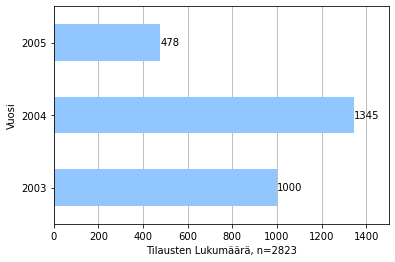

In [13]:
ax1 = df3.drop("Yhteensä")["Lukumäärä"].plot.barh()

ax1.set_xlabel("Tilausten Lukumäärä, n=" +str(n))
ax1.set_ylabel("Vuosi")

ax1.grid(axis="x")
ax1.set_axisbelow(True)
#ax1.tick_params(axis = 'x', length = 0)

for bar in ax1.patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = "{:.0f}".format(x)
    ax1.text(x = x, y = y, s = "" + label, va = "center")
ax1.set_xlim(0, 1500)

(0.0, 1500.0)

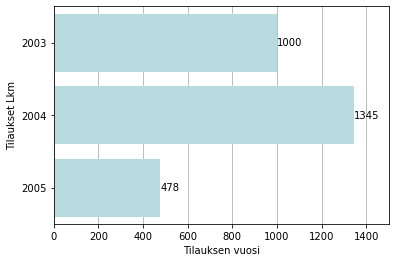

In [14]:
ax1 = sns.countplot(y=df["YEAR_ID"], color="C5")
ax1.set_ylabel("Tilaukset Lkm")
ax1.set_xlabel("Tilauksen vuosi")
ax1.grid(axis="x")
ax1.set_axisbelow(True)

for bar in ax1.patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = "{:.0f}".format(x)
    ax1.text(x = x, y = y, s = "" + label, va = "center")
ax1.set_xlim(0, 1500)

<h4>Minkä verran eri kokoisia diilejä on tehty?</h4>

(0.0, 1500.0)

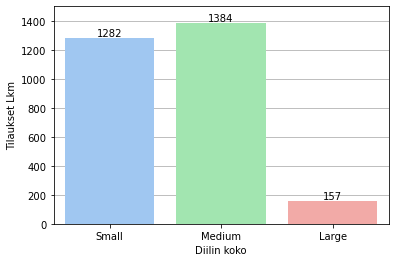

In [15]:
ax2 = sns.countplot(x=df["DEALSIZE"])
ax2.set_ylabel("Tilaukset Lkm")
ax2.set_xlabel("Diilin koko")
ax2.grid(axis="y")
ax2.set_axisbelow(True)

for bar in ax2.patches:
    x = bar.get_x() + bar.get_width() / 2 
    y = bar.get_height() 
    label = "{:.0f}".format(y)
    ax2.text(x = x, y = y, s = "" + label, va = "bottom", ha="center")
ax2.set_ylim(0, 1500)   

<h4>Minkä verran eri tuoteryhmien tuotteita on myyty?</h4>

In [16]:
df4 = pd.crosstab (df["PRODUCTLINE"],"Lukumäärä") 
df4.columns.name = ""

#df5.index = PRODUCTLINE

n = df4["Lukumäärä"].sum()

df4["%"] = df4 ["Lukumäärä"] / n*100

df4.loc["Yhteensä"]= df4.sum()

df4.style.format({"Lukumäärä" : "{:.0f}", "%" : "{:.1f} %"})

,Lukumäärä,%
PRODUCTLINE,,
Classic Cars,967,34.3 %
Motorcycles,331,11.7 %
Planes,306,10.8 %
Ships,234,8.3 %
Trains,77,2.7 %
Trucks and Buses,301,10.7 %
Vintage Cars,607,21.5 %
Yhteensä,2823,100.0 %


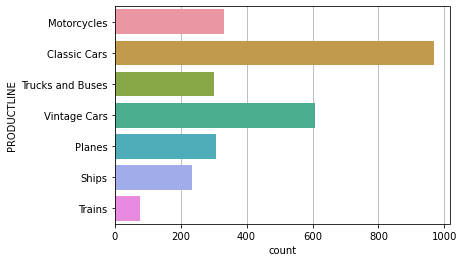

In [17]:
ax3 = sns.countplot(y=df["PRODUCTLINE"])
#ax3.set_ylabel("Määrä")
#ax3.set_xlabel("Lukumäärä")
ax3.grid(axis="x")
ax3.set_axisbelow(True)
#ax3.tick_params(labelsize=10)
#plt.text(x=0, y=2, s="10", 
                 #color='white', fontsize=18, horizontalalignment='center')

In [18]:
df5 = pd.crosstab (df["PRODUCTLINE"],"Lukumäärä") 
df5.columns.name = ""

#df5.index = PRODUCTLINE

n = df5["Lukumäärä"].sum()

df5["%"] = df5 ["Lukumäärä"] / n*100

df5.loc["Yhteensä"]= df5.sum()

df5.style.format({"Lukumäärä" : "{:.0f}", "%" : "{:.1f} %"})

,Lukumäärä,%
PRODUCTLINE,,
Classic Cars,967,34.3 %
Motorcycles,331,11.7 %
Planes,306,10.8 %
Ships,234,8.3 %
Trains,77,2.7 %
Trucks and Buses,301,10.7 %
Vintage Cars,607,21.5 %
Yhteensä,2823,100.0 %


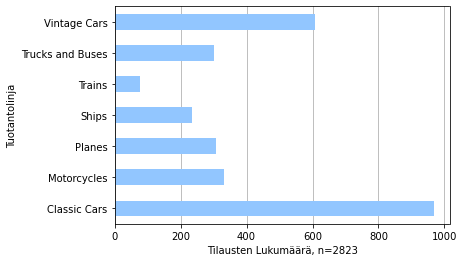

In [19]:
ax4 = df5.drop("Yhteensä")["Lukumäärä"].plot.barh()

ax4.set_xlabel("Tilausten Lukumäärä, n=" +str(n))
ax4.set_ylabel("Tuotantolinja")

ax4.grid(axis="x")
ax4.set_axisbelow(True)

<h4>Miten tilausten määrä jakautuu eri maiden välille?</h4>

In [20]:
df6 = pd.crosstab (df["COUNTRY"],"Amount")

df6.columns.name = ""

#df6.index = COUNTRY

n = df6["Amount"].sum()

df6["%"] = df6 ["Amount"] / n*100

df6.loc["Yhteensä"]= df6.sum()
df6
#df6.T.style.format({"Amount" : "{:.0f}", "%" : "{:.1f} %"})
#df6.T.style.format({"Lukumäärä" : "{:.0f}", "%" : "{:.1f} %"})
#Style ominaisuus ei toimi T :n kanssa
#df.T.style.format(mapper)

,Amount,%
COUNTRY,,
Australia,185.0,6.553312
Austria,55.0,1.948282
Belgium,33.0,1.168969
Canada,70.0,2.479632
Denmark,63.0,2.231668
Finland,92.0,3.258944
France,314.0,11.122919
Germany,62.0,2.196245
Ireland,16.0,0.566773


In [21]:
df6 = pd.crosstab (df["COUNTRY"],"Amount")

df6.columns.name = ""

#df6.index = COUNTRY

n = df6["Amount"].sum()

df6["%"] = df6 ["Amount"] / n*100

df6.loc["Yhteensä"]= df6.sum()
df6.T.style.format({"Amount" : "{:.0f}", "%" : "{:.1f} %"})
#df6.T.style.format({"Lukumäärä" : "{:.0f}", "%" : "{:.1f} %"})
#Style ominaisuus ei toimi T :n kanssa, varmasti koska se on nyt columns eikä axis..?


COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Yhteensä
,,,,,,,,,,,,,,,,,,,,
Amount,185.000000,55.000000,33.000000,70.000000,63.000000,92.000000,314.000000,62.000000,16.000000,113.000000,52.000000,85.000000,26.000000,79.000000,342.000000,57.000000,31.000000,144.000000,1004.000000,2823.000000
%,6.553312,1.948282,1.168969,2.479632,2.231668,3.258944,11.122919,2.196245,0.566773,4.002834,1.842012,3.010981,0.921006,2.798441,12.114772,2.019129,1.098123,5.100956,35.565002,100.000000


<h3>Miten eri kokoiset diilit jakautuvat eri maiden kesken?</h3>

In [22]:
df7 = pd.crosstab(df["COUNTRY"], df["DEALSIZE"])
df7.columns.name = ""
#df10.index = COUNTRY
#df10.columns = DEALSIZE
df7

,Large,Medium,Small
COUNTRY,,,
Australia,7,86,92
Austria,4,29,22
Belgium,0,15,18
Canada,1,33,36
Denmark,6,31,26
Finland,5,46,41
France,21,149,144
Germany,4,30,28
Ireland,2,6,8


<p>Ylläoleva Ristiintaulukko toimii hyvin. <br>
 Alla tehtynä stacked näkymä Ristiintaulukoinnista Maiden ja Diilikokejen välillä, kuten näkyy ei toimi kuvana hyvin. En osannut säätää x- leveyttä ja miten voi tehdä pienemmät kuin 100kpl välit taulukkoon?</p>

(0.0, 1200.0)

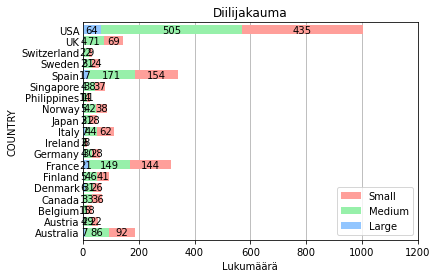

In [23]:
ax5 = df7.plot.barh(width = 0.8, legend="reverse", stacked=True)

ax5.set_title("Diilijakauma")
ax5.set_xlabel("Lukumäärä")
#ax5.set_ylabel("Maa")

ax5.grid(axis="x")
ax5.set_axisbelow(True)
ax5.tick_params(axis = "y", length = 0)


for bar in ax5.patches:
    left, bottom, width, height = bar.get_bbox().bounds 
    if width > 0:
        label= "{:.0f}".format(width)
        ax5.text(x = left + width / 2, y=bottom + height / 2, s = label, ha = "center", va = "center")
ax5.set_xlim(0,1200)


<h3>Minkä verran diilejä on tehty yhteensä maittain?</h3>

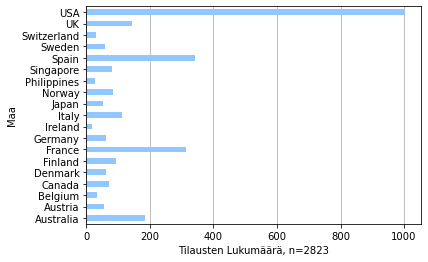

In [24]:
ax6 = df6.drop("Yhteensä")["Amount"].plot.barh()

ax6.set_xlabel("Tilausten Lukumäärä, n=" +str(n))
ax6.set_ylabel("Maa")

ax6.grid(axis="x")
ax6.set_axisbelow(True)

<h4>Sama taulukko kuin yllä Seaborn tyylillä</h4>

Text(0, 0.5, 'Maa')

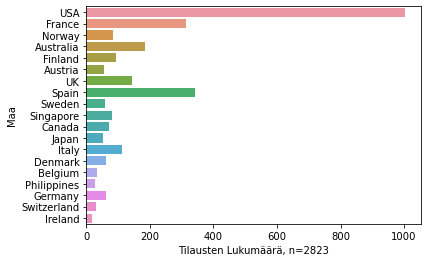

In [25]:
ax6 = sns.countplot(y=df["COUNTRY"])
ax6.set_xlabel("Tilausten Lukumäärä, n=" +str(n))
ax6.set_ylabel("Maa")

In [26]:
bins = [400, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000]

df["Sales Levels"] = pd.cut(df["SALES"], bins = bins)

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Sales Levels
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,"(2000, 3000]"
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,"(2000, 3000]"
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,"(3000, 4000]"
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,"(3000, 4000]"
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,"(5000, 6000]"


In [27]:
df8 = pd.crosstab(df["Sales Levels"], "Amount")

df8.columns.name = ''

n = df8["Amount"].sum()
df8['%'] = df8 / n * 100 #prosentit
df8

# Testasin että taulukko näyttää oikealta

,Amount,%
Sales Levels,,
"(400, 1000]",50,1.771793
"(1000, 2000]",515,18.249468
"(2000, 3000]",717,25.407512
"(3000, 4000]",623,22.076541
"(4000, 5000]",369,13.075833
"(5000, 6000]",255,9.036145
"(6000, 7000]",137,4.854713
"(7000, 8000]",78,2.763997
"(8000, 9000]",47,1.665485


In [28]:
df8 = pd.crosstab(df["Sales Levels"], "Amount")

df8.columns.name = ''

n = df8["Amount"].sum()
df8['%'] = df8 / n * 100
#df8

df8.index = df8.index.astype(str)
df8.loc["Total"] = df8.sum()
#df8

df8.style.format({"Amount": '{:.0f}', '%': '{:.1f} %'})

,Amount,%
Sales Levels,,
"(400, 1000]",50,1.8 %
"(1000, 2000]",515,18.2 %
"(2000, 3000]",717,25.4 %
"(3000, 4000]",623,22.1 %
"(4000, 5000]",369,13.1 %
"(5000, 6000]",255,9.0 %
"(6000, 7000]",137,4.9 %
"(7000, 8000]",78,2.8 %
"(8000, 9000]",47,1.7 %


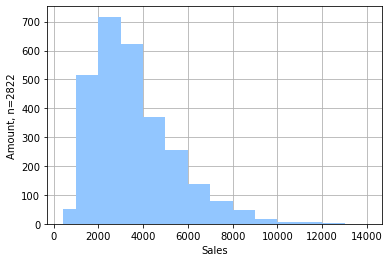

In [29]:
ax7 = df["SALES"].hist(bins = bins)

ax7.set_xlabel("Sales")
ax7.set_ylabel("Amount, n=" + str(n))
ax7.set_axisbelow(True)

<p>En saanut prosentti histogrammia toimimaan, koodi alla. Sanoo että np. is not defined</p>

In [31]:
#ax8 = df["SALES"].hist(bins = bins, weights = np.ones(n) / n * 100)

#ax8.set_xlabel("SALES")
#ax8.set_ylabel('%, n=' + str(n))